# B. Data pre-processing & Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data

In [63]:
# load the provided downloded and cleaned data from the forage simulation website
cleaned_data_df = pd.read_csv('./clean_data_after_eda.csv')

In [64]:
# read price data
price_df = pd.read_csv('price_data.csv')

In [253]:
cleaned_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

## 3. Feature Engineering

### 3.1 Convert Date Columns to datetime

In [65]:
# convert date columns to datetime in the cleaned_data dataframe
cleaned_data_df["date_activ"] = pd.to_datetime(cleaned_data_df["date_activ"], format='%Y-%m-%d')
cleaned_data_df["date_end"] = pd.to_datetime(cleaned_data_df["date_end"], format='%Y-%m-%d')
cleaned_data_df["date_modif_prod"] = pd.to_datetime(cleaned_data_df["date_modif_prod"], format='%Y-%m-%d')
cleaned_data_df["date_renewal"] = pd.to_datetime(cleaned_data_df["date_renewal"], format='%Y-%m-%d')

In [66]:
cleaned_data_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [67]:
cleaned_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

The cleaned data frame has 44 columns/features. 18 features added. 

In [68]:
cleaned_data_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175


In [69]:
# convert date columns in price dataset to datetime
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [70]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


### 3.2 Add a feature that shows changes in off peak prices between December and January of the preceding year

In [71]:
# Hypothesis “The difference between off-peak prices in December and January the preceding year could be a significant feature when predicting churn”

# Group off-peak prices by companies and month and calculate the means
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [ ]:
# merge the diff data frame with the cleaned data frame to create merged_df
merged_df = pd.merge(cleaned_data_df, diff, on='id')
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


In [73]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

Merged_df has 45 features and 1 target variable.

### 3.3 Add features that show differences between off peak, mid peak and peak periods for each company 

In [74]:
# Aggregate average price variance and fixed prices for off peak, mid peak and peak periods by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [75]:
# Calculate the mean difference between consecutive periods i.e. off peak - peak, peak - mid peak, off peak - mid peak for both variance and fixed prices
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [ ]:
#  select the columns to merge with the merged_df to create merged_df_2
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]

# merge the mean_prices data frame with the merged cleaned data frame
merged_df_2= pd.merge(merged_df, mean_prices[columns], on='id')
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

Merged_df has 51 features and 1 target variable.

### 3.4 Add a feature that shows differences in average prices per period per company per price date

In [77]:
# Aggregate average prices per period by company per price_date
mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [78]:
# Calculate the mean difference between consecutive periods i.e. off peak - peak, peak - mid peak, off peak - mid peak for both variance and fixed prices by month.
mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [79]:
# Calculate the maximum monthly difference across months per company
max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [ ]:
# select the columns to merge with the merged_df_2 to create merged_df_3
columns = [
    'id',
    'off_peak_peak_var_max_monthly_diff',
    'peak_mid_peak_var_max_monthly_diff',
    'off_peak_mid_peak_var_max_monthly_diff',
    'off_peak_peak_fix_max_monthly_diff',
    'peak_mid_peak_fix_max_monthly_diff',
    'off_peak_mid_peak_fix_max_monthly_diff'
]

# merge the max_diff_across_periods_months data frame with the merged cleaned data frame
merged_df_3 = pd.merge(merged_df_2, max_diff_across_periods_months[columns], on='id')
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      14606 non-null  object        
 1   channel_sales                           14606 non-null  object        
 2   cons_12m                                14606 non-null  int64         
 3   cons_gas_12m                            14606 non-null  int64         
 4   cons_last_month                         14606 non-null  int64         
 5   date_activ                              14606 non-null  datetime64[ns]
 6   date_end                                14606 non-null  datetime64[ns]
 7   date_modif_prod                         14606 non-null  datetime64[ns]
 8   date_renewal                            14606 non-null  datetime64[ns]
 9   forecast_cons_12m                       14606 non-

merged_df_3 has 57 features and 1 target variable

### 3.5 Add a new feature; tenure for how long a company has been a client for the power company

In [81]:
# add a new column 'tenure' to the merged_df_3 dataframe which will contain data in years for how long a company has been a customer
merged_df_3['tenure'] = ((merged_df_3['date_end'] - merged_df_3['date_activ']).dt.days / 365).astype(int) 
 
merged_df_3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      14606 non-null  object        
 1   channel_sales                           14606 non-null  object        
 2   cons_12m                                14606 non-null  int64         
 3   cons_gas_12m                            14606 non-null  int64         
 4   cons_last_month                         14606 non-null  int64         
 5   date_activ                              14606 non-null  datetime64[ns]
 6   date_end                                14606 non-null  datetime64[ns]
 7   date_modif_prod                         14606 non-null  datetime64[ns]
 8   date_renewal                            14606 non-null  datetime64[ns]
 9   forecast_cons_12m                       14606 non-

58 features and 1 target variable

### 3.6 Change 4 columns that contain data on dates to months as datetime is not used in classification models and hence create new features in months. 

i.e 
1. date_activ to months_activ = Number of months active until reference date (Jan 2016)
2. date_end to months_to_end = Number of months of the contract left until reference date (Jan 2016)
3. date_modify_prod to months_modif_prod = Number of months since last modification until reference date (Jan 2016)
4. date_renewal to months_renewal = Number of months since last renewal until reference date (Jan 2016)

- This features may help to increase the predictive ability of the classification model for customer churn

In [82]:
# create a function to convert timestamps to months
def convert_months(reference_date, df, column):
    """
    Converts a column of timestamps into the number of full months 
    between each timestamp and a reference date.

    Parameters:
    - reference_date (datetime): The reference date for comparison.
    - df (pd.DataFrame): The dataframe containing the column.
    - column (str): The name of the datetime column in the dataframe.

    Returns:
    - pd.Series: A Series containing the number of full months.
    """

    # Ensure the column is in datetime format
    df[column] = pd.to_datetime(df[column], errors='coerce')

    # Extract year and month differences
    year_diff = reference_date.year - df[column].dt.year
    month_diff = reference_date.month - df[column].dt.month

    # Compute total months difference
    total_months = (year_diff * 12) + month_diff

    # Adjust for day difference (if the day of the reference_date is earlier than df[column])
    day_adjustment = reference_date.day < df[column].dt.day
    total_months -= day_adjustment.astype(int)

    return total_months

In [83]:
import datetime

# Create reference date
reference_date = datetime.datetime(2016, 1, 1)

# Create columns
merged_df_3['months_activ'] = convert_months(reference_date, merged_df_3, 'date_activ')
merged_df_3['months_to_end'] = -convert_months(reference_date, merged_df_3, 'date_end')
merged_df_3['months_modif_prod'] = convert_months(reference_date, merged_df_3, 'date_modif_prod')
merged_df_3['months_renewal'] = convert_months(reference_date, merged_df_3, 'date_renewal')

merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   id                                      14606 non-null  object        
 1   channel_sales                           14606 non-null  object        
 2   cons_12m                                14606 non-null  int64         
 3   cons_gas_12m                            14606 non-null  int64         
 4   cons_last_month                         14606 non-null  int64         
 5   date_activ                              14606 non-null  datetime64[ns]
 6   date_end                                14606 non-null  datetime64[ns]
 7   date_modif_prod                         14606 non-null  datetime64[ns]
 8   date_renewal                            14606 non-null  datetime64[ns]
 9   forecast_cons_12m                       14606 non-

In [84]:
# drop the 4 columns: 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal' from the merged_df_3 dataframe as they are not necessary for the model
merged_df_3.drop(['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'], axis=1, inplace=True)

merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      14606 non-null  object 
 1   channel_sales                           14606 non-null  object 
 2   cons_12m                                14606 non-null  int64  
 3   cons_gas_12m                            14606 non-null  int64  
 4   cons_last_month                         14606 non-null  int64  
 5   forecast_cons_12m                       14606 non-null  float64
 6   forecast_cons_year                      14606 non-null  int64  
 7   forecast_discount_energy                14606 non-null  float64
 8   forecast_meter_rent_12m                 14606 non-null  float64
 9   forecast_price_energy_off_peak          14606 non-null  float64
 10  forecast_price_energy_peak              14606 non-null  fl

The dataframe has 58 features and 1 target variable.

### 3.7 Change of values for the categorical variable 'has_gas' to boolean values

In [86]:
pd.set_option('future.no_silent_downcasting', True)

merged_df_3['has_gas'] = merged_df_3['has_gas'].replace(['t', 'f'], [1, 0])
merged_df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      14606 non-null  object 
 1   channel_sales                           14606 non-null  object 
 2   cons_12m                                14606 non-null  int64  
 3   cons_gas_12m                            14606 non-null  int64  
 4   cons_last_month                         14606 non-null  int64  
 5   forecast_cons_12m                       14606 non-null  float64
 6   forecast_cons_year                      14606 non-null  int64  
 7   forecast_discount_energy                14606 non-null  float64
 8   forecast_meter_rent_12m                 14606 non-null  float64
 9   forecast_price_energy_off_peak          14606 non-null  float64
 10  forecast_price_energy_peak              14606 non-null  fl

### 3.8 Check for multicollinearity & removal of features that have a high correlation of >0.99

Check correlation of the numerical features

In [179]:
# Calculate the correlation matrix
correlation_matrix = merged_df_3.drop(columns=['id', 'channel_sales', 'origin_up']).corr() # remove the column id and the categorical columns & compute the correlation matrix

# Set a threshold for high correlation
threshold = 0.99

# Find pairs of features with correlation above the threshold of 0.99. This are features that are highly correlated. 
feature_pairs = []
for i in range(len(correlation_matrix.columns)): 
    for j in range(i): # Ensures we only check each pair once (avoiding duplicates)
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the feature pairs with their correlation score 
for pair in feature_pairs:
    print(f"Feature pair: {pair[0]} and {pair[1]} with correlation score: {pair[2]:.2f}")

Feature pair: margin_net_pow_ele and margin_gross_pow_ele with correlation score: 1.00
Feature pair: var_year_price_off_peak and var_year_price_off_peak_fix with correlation score: 1.00
Feature pair: var_year_price_peak and var_year_price_peak_fix with correlation score: 1.00
Feature pair: var_year_price_mid_peak and var_year_price_mid_peak_fix with correlation score: 1.00
Feature pair: var_6m_price_off_peak and var_6m_price_off_peak_fix with correlation score: 1.00
Feature pair: var_6m_price_peak and var_6m_price_peak_fix with correlation score: 1.00
Feature pair: var_6m_price_mid_peak and var_6m_price_mid_peak_fix with correlation score: 1.00
Feature pair: off_peak_peak_var_max_monthly_diff and off_peak_peak_var_mean_diff with correlation score: 0.99
Feature pair: peak_mid_peak_fix_max_monthly_diff and peak_mid_peak_fix_mean_diff with correlation score: 1.00


- Remove features with a correlation of >0.99 to deal with redudancy.
- 1 variable out of the pair will be dropped from the data frame

In [180]:
# delete redudant features from the merged_df_3 and creeate merged_df_4. 
merged_df_4 = merged_df_3.drop(['margin_net_pow_ele',
                                'var_year_price_off_peak_fix',
                                'var_year_price_peak_fix',
                                'var_year_price_mid_peak_fix',
                                'var_6m_price_off_peak_fix',
                                'var_6m_price_peak_fix',
                                'var_6m_price_mid_peak_fix',
                                'peak_mid_peak_fix_mean_diff',
                                'off_peak_peak_var_max_monthly_diff'
                                ], 
                               axis=1, 
                               inplace=False)

In [181]:
merged_df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      14606 non-null  object 
 1   channel_sales                           14606 non-null  object 
 2   cons_12m                                14606 non-null  int64  
 3   cons_gas_12m                            14606 non-null  int64  
 4   cons_last_month                         14606 non-null  int64  
 5   forecast_cons_12m                       14606 non-null  float64
 6   forecast_cons_year                      14606 non-null  int64  
 7   forecast_discount_energy                14606 non-null  float64
 8   forecast_meter_rent_12m                 14606 non-null  float64
 9   forecast_price_energy_off_peak          14606 non-null  float64
 10  forecast_price_energy_peak              14606 non-null  fl

- Merged_df_4 has 49 features and 1 target variable

### 3.9 Encoding of 2 nominal categorical variables

Check number of unique values in the nominal categorical columns;'origin_up' and 'channel sales' columns. 

In [182]:
merged_df_4['origin_up'].nunique()

6

For the feature; origin_up use one hot encoding. 

In [183]:
merged_df_4['channel_sales'].nunique()

8

In [184]:
# create a function for creating a frequency table for the 2 categorical columns;'origin_up' and 'channel sales' columns
def generate_frequency_table(df, column):
    """
    Generate a frequency table for a given column in a dataframe.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the column.
    - column (str): The name of the column for which to generate the frequency table.
    
    Returns:
    - pd.DataFrame: A dataframe containing the counts and percentages of each unique value in the column.
    """
    frequency_table = df[column].value_counts().reset_index()
    frequency_table.columns = [column, 'Count']
    frequency_table['Percentage'] = (frequency_table['Count'] / len(df)) * 100
    return frequency_table

# Generate frequency tables for categorical columns
categorical_columns = ['channel_sales', 'origin_up']

for column in categorical_columns:
    frequency_table = generate_frequency_table(merged_df_4, column)
    print(f"Frequency table for {column}:\n", frequency_table, "\n")

Frequency table for channel_sales:
                       channel_sales  Count  Percentage
0  foosdfpfkusacimwkcsosbicdxkicaua   6754   46.241271
1                           MISSING   3725   25.503218
2  lmkebamcaaclubfxadlmueccxoimlema   1843   12.618102
3  usilxuppasemubllopkaafesmlibmsdf   1375    9.413939
4  ewpakwlliwisiwduibdlfmalxowmwpci    893    6.113926
5  sddiedcslfslkckwlfkdpoeeailfpeds     11    0.075312
6  epumfxlbckeskwekxbiuasklxalciiuu      3    0.020540
7  fixdbufsefwooaasfcxdxadsiekoceaa      2    0.013693 

Frequency table for origin_up:
                           origin_up  Count  Percentage
0  lxidpiddsbxsbosboudacockeimpuepw   7097   48.589621
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   4294   29.398877
2  ldkssxwpmemidmecebumciepifcamkci   3148   21.552787
3                           MISSING     64    0.438176
4  usapbepcfoloekilkwsdiboslwaxobdp      2    0.013693
5  ewxeelcelemmiwuafmddpobolfuxioce      1    0.006847 



Use one hot encoding to encode the 2 nominal categorical variables

In [185]:
# Us One-hot encoding to encode the 2 nominal categorical columns: 'channel_sales' and 'origin_up' and create the dataframe: encode_df
encoded_df = pd.get_dummies(merged_df_4, columns=['channel_sales', 'origin_up'], drop_first=True)

# Display the first few rows of the encoded dataframe
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 60 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  int64  
 2   cons_gas_12m                                    14606 non-null  int64  
 3   cons_last_month                                 14606 non-null  int64  
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  int64  
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

In [186]:
encoded_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,False,True,False,False,False,False,False,False,True,False
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,False,False,False,False,False,False,True,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,False,True,False,False,False,False,True,False,False,False
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,False,False,True,False,False,False,True,False,False,False
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,False,False,False,False,False,False,True,False,False,False


- encoded_df has 59 features and 1 target variable

### 3.10 Transformation of columns with skewed data

In [187]:
# transform data with positive skewness using a log transformer and create transformed_df 
# create a list of columns to transform
transform_cols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m', 'forecast_cons_year','margin_gross_pow_ele', 'net_margin']

# create a copy of the encoded_df dataframe
transformed_df = encoded_df.copy()

# apply the log transformation to the columns in the transform_cols list
transformed_df[transform_cols] = np.log1p(transformed_df[transform_cols])

transformed_df.head()


,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_ewxeelcelemmiwuafmddpobolfuxioce,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,10.914124,0.000000,0.000000,0.000000,0.0,1.78,0.114481,0.098142,...,False,True,False,False,False,False,False,False,True,False
1,d29c2c54acc38ff3c0614d0a653813dd,8.446985,0.000000,0.000000,5.252012,0.000000,0.0,16.27,0.145711,0.000000,...,False,False,False,False,False,False,True,False,False,False
2,764c75f661154dac3a6c254cd082ea7d,6.300786,0.000000,0.000000,3.891004,0.000000,0.0,38.72,0.165794,0.087899,...,False,True,False,False,False,False,True,False,False,False
3,bba03439a292a1e166f80264c16191cb,7.368340,0.000000,0.000000,5.484963,0.000000,0.0,19.83,0.146694,0.000000,...,False,False,True,False,False,False,True,False,False,False
4,149d57cf92fc41cf94415803a877cb4b,8.395252,0.000000,6.267201,6.101999,6.267201,0.0,131.73,0.116900,0.100015,...,False,False,False,False,False,False,True,False,False,False


In [188]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 60 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  float64
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

# C. Additional Feature Engineering and Modelling

---

1. Import machine learning packages
2. Modelling

---

## 1. Import required modules for machine learning

In [255]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# classification modules for Random Forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

---

## 2. Modelling

### 2.1 Handling Class imbalance for target variable

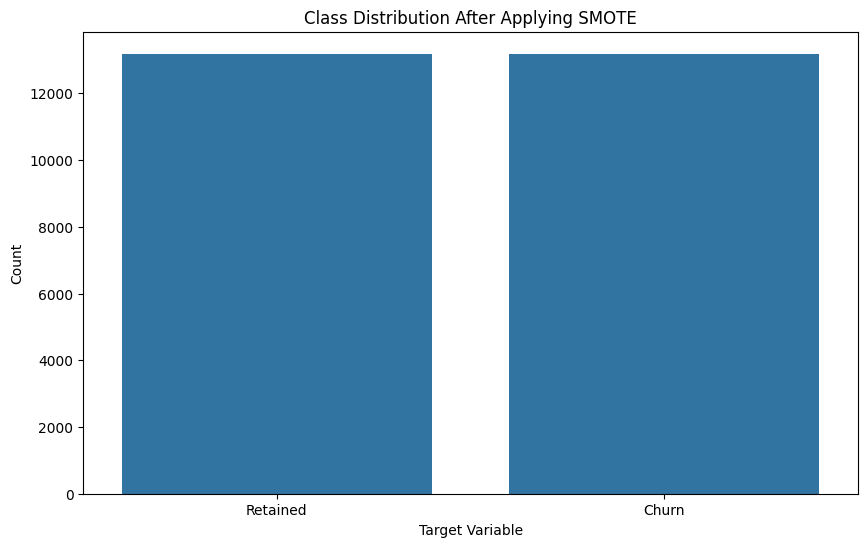

churn
1    13187
0    13187
Name: count, dtype: int64


In [190]:
# handle class imbalance for the target variable using SMOTE and also because the classification problem is binary.

# Make a copy of our data
train_df = transformed_df.copy()

# Separate target variable from independent variables and drop id column as it's not required.
y = transformed_df['churn']
X = transformed_df.drop(columns=['id', 'churn'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=124, sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X, y)

# Plot the class distribution after applying SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_res)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks((0, 1), ["Retained", "Churn"])
plt.show()

print(y_res.value_counts())

In [191]:
print(X_res.shape)
print(y_res.shape)

(26374, 58)
(26374,)


### 2.2 Splitting of data into samples of train and test sets

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42) # use 75% of the data for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19780, 58)
(19780,)
(6594, 58)
(6594,)


### 2.3 Model Training

### 2.3.1 Random Forest Classifier Base model

- Random forest classifier has been chosen for the binary classification problem due to the following reasons:
  - The dataset has many features (59) and the number of rows is 14,606
  - The relationship between the features and the target variables was non-linear evidenced by lack of linear separablity
  - One can generate  and get a measure of feature importance which will be important in determining the features contribution the most to predicting churn by the companies/customers and giving more insights into the data. 
  - To reduce overfitting as a random forest classifer problem is robust and more generealizable to unseen data
  - A random forest classifier is a good base model to start with

In [193]:
# train model and add parameters
# base model for random forest with default parameters
base_model = RandomForestClassifier() 
base_model.fit(X_train, y_train)

RandomForestClassifier()

parameters for base model:
- n_estimators=100,    # Number of trees
- criterion='gini',    # Split criterion (also supports 'entropy')
- max_depth=None,      # No depth limit (fully grown trees)
- min_samples_split=2, # Minimum samples needed to split a node
- min_samples_leaf=1,  # Minimum samples needed in a leaf node
- max_features='sqrt', # Number of features considered for best split
- bootstrap=True,      # Uses bootstrapping
- random_state=None,   # Random seed (set for reproducibility)

#### Evaluation

Evaluate how well the trained random forest base model is able to predict the values of the test dataset.

- Accuracy - to measure the proportion of correctly predicted instances out of the total instances in the dataset.
- precision - will measure How many of the predicted churners actually churned? Useful if false positives (predicting someone will churn when they won’t) is costly.
- recall - will measure how many actual churners were correctly predicted? Will be useful if missing a churner is costly (e.g., losing valuable customers).
- f1-score - to get a good balance between precison & recall
- average_precision_score - as the target class is imbalanced, the metric will focus on precision & recall trade-off rather than true negative rate.
- confusion_matrix - to help identify misclassification patterns

In [206]:
# As the business problem is a binary classification problem predicting churn of customers with imbalanced classes, accuracy, precison, recall, f1_score and average precision score will be used as metrics for the model.
# In addition a confusion matrix will be generated to help identify the misclassiication pattrns. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score, precision_recall_curve, auc

In [207]:
# Generate predictions
y_pred = base_model.predict(X_test) # predicitions made by the model
y_proba = base_model.predict_proba(X_test)[:, 1] # predict class probabilities for each sample in X_test and select the probabilities for the positive class for each sample

In [209]:
# Calculate performance metrics here!
# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9451
Precision: 0.9768
Recall: 0.9126
F1-Score: 0.9436
PR-AUC: 0.9851


- Base model has:
  - high accuracy score of 0.9433. The model is predicting a very high proportion of correctly predicted instances out of the total instances in the dataset i.e 94.33%
  - high precision score of 0.9736, which means that the model is predicting 97.36% of true positives, i.e non-churners/retained companies. This means that very few non-churners are mistakenly classified as churners (low false positive rate).
  - high recall score of  0.9120. This means that 91.2% of actual churners were correctly classified by the model, while 8.8% were missed (false negatives). The model is correctly prediciting most of the churners. 
  - high f1 score of 0.9409. This means that the model has a strong balance between precision and recall when predicting customer churn. 
  - high PR-AUC score of  0.9848. This means the model is performing extremely well in distinguishing churners from retained companies, particularly in scenarios with class imbalance (where churners are much fewer than non-churners).
- Hyperparameters tuning, further feature engineering, use of different models tried or threshold adjustments to see if there will be further improvement of the metrics. 

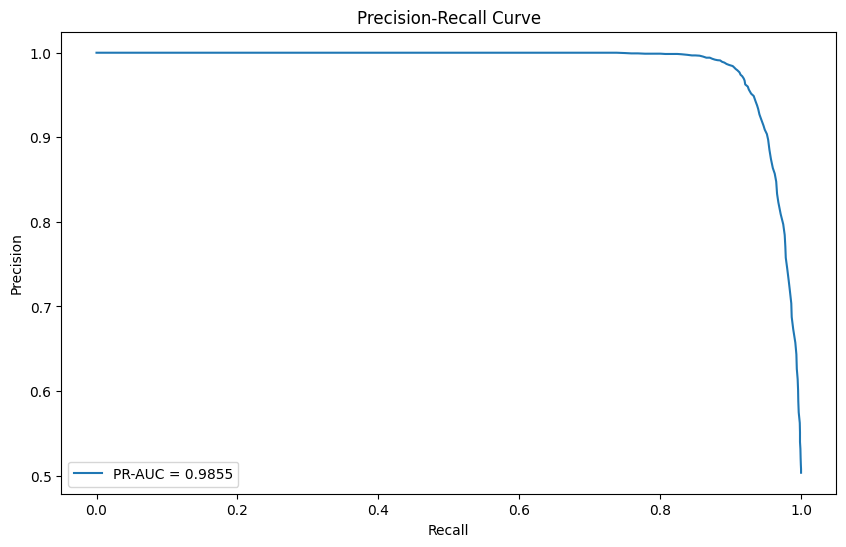

In [210]:
# Calculate precision-recall pairs for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

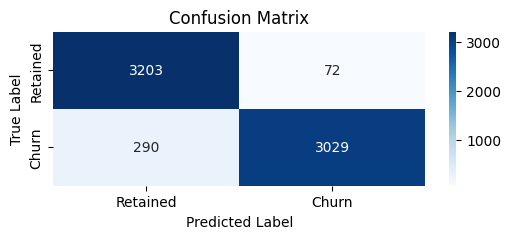

In [211]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(6,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churn'], yticklabels=['Retained', 'Churn'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Feature importance

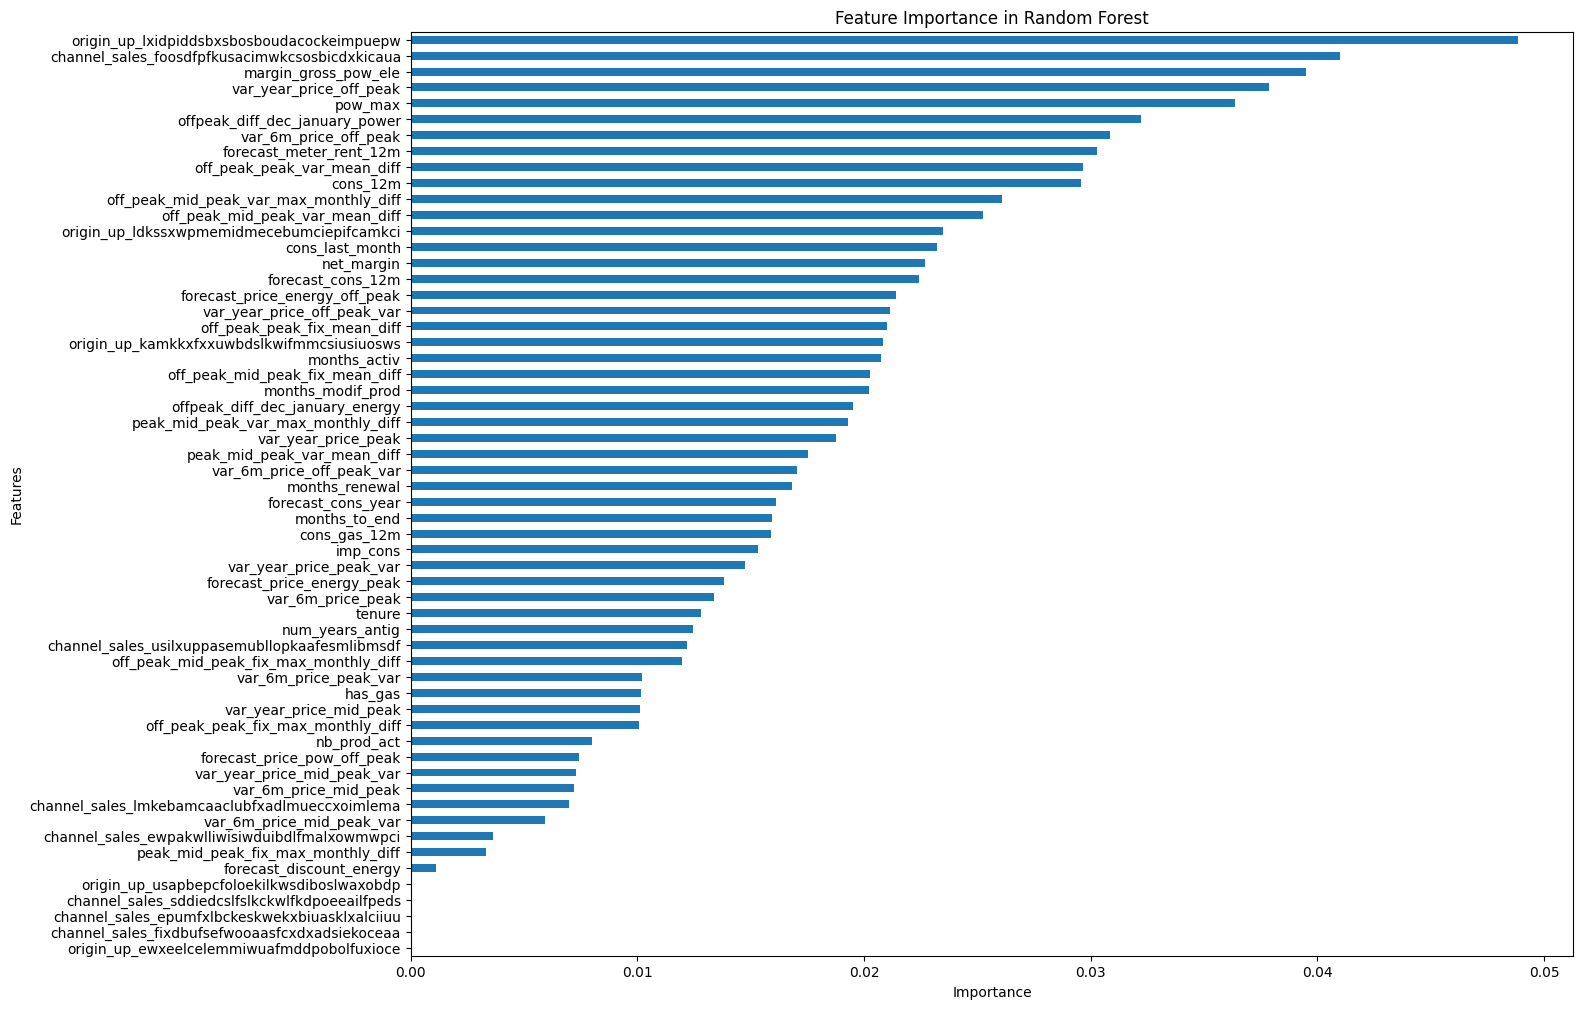

In [212]:
# Find which factors contribute most to churn.
feature_importances = pd.Series(base_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(15,12))

plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

- The top 5 features contributing to churn are:
  - The **'lxidpiddsbxsbosboudacockeimpuepw'** code of the electricity campaign the customer first subscribed to
  - The gross margin on power subscription (margin_gross_pow_ele)
  - The subscribed power (pow_max)
  - The yearly variation in the variability in price of energy for the 1st period (off peak) hours (var_year_price_off_peak_var)
  - The **'foosdfpfkusacimwkcsosbicdxkicaua'** sales channel
  
- The hypothesis that price sensitivity could be leading to customer churn seems plausible as the features that describe variance of the off peak prices yearly is one of the top 5 important features. 

In [213]:
# Get feature importances from the trained model
importances = base_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

                                           Feature  Importance
56      origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.048850
49  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.040998
12                            margin_gross_pow_ele    0.039501
20                         var_year_price_off_peak    0.037850
16                                         pow_max    0.036352
30                  offpeak_diff_dec_january_power    0.032204
26                           var_6m_price_off_peak    0.030868
6                          forecast_meter_rent_12m    0.030261
31                     off_peak_peak_var_mean_diff    0.029642
0                                         cons_12m    0.029558
37          off_peak_mid_peak_var_max_monthly_diff    0.026101
33                 off_peak_mid_peak_var_mean_diff    0.025270
55      origin_up_ldkssxwpmemidmecebumciepifcamkci    0.023470
2                                  cons_last_month    0.023215
14                                      net_margin    0

- Features that do not contribute to churn are;
  - channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa
  - origin_up_ewxeelcelemmiwuafmddpobolfuxioce
  - channel_sales_epumfxlbckeskwekxbiuasklxalciiuu
- This features will be deleted from the dataset.
  
- In addition, the features that have very low contribution will be deleted. They are;
  - channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds
  - origin_up_usapbepcfoloekilkwsdiboslwaxobdp
 

#### Hyperparameter tuning

In [201]:
# RamdomizedsearhCV used for hyperparameter tuning as the dataset is large and it's fast. 
# Optimize the Random Forest model for better results.
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [300, 400, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

rf_tuned_model = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    n_iter=10, 
    scoring= 'f1',
    n_jobs=-1
)

rf_tuned_model.fit(X_train, y_train)
print("Best Parameters:", rf_tuned_model.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}


In [214]:
# Apply the best hyperparamters to make predictions
y_pred = rf_tuned_model.predict(X_test) 
y_proba = rf_tuned_model.predict_proba(X_test)[:, 1]

# Compute performace Metrics of tuned model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9427
Precision: 0.9724
Recall: 0.9120
F1-Score: 0.9412
PR-AUC: 0.9850


#### Threshold tuning

In [215]:
# Adjust probability thresholds to optimize precision/recall balance
from sklearn.metrics import precision_recall_curve

# Generate predicted probabilities for the positive class
y_proba = rf_tuned_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find the threshold that gives the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {f1_scores[best_threshold_index]:.4f}")

Best Threshold: 0.4662
Best F1-Score: 0.9423


In [217]:
# Apply the best threshold to make final predictions
y_pred_threshold = (y_proba >= best_threshold).astype(int)

# Calculate performance metrics with the new threshold
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
pr_auc = average_precision_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics with Threshold Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics with Threshold Tuning:
Accuracy: 0.9431
Precision: 0.9635
Recall: 0.9220
F1-Score: 0.9423
PR-AUC: 0.9850


### 2.3.3 Improving random forest model by deletion of features & robust scaling

#### Deletion of features with no importance to the random forest model

In [219]:
# remove unneccesary features from transformed df

# List of columns to drop
columns_to_drop = ['channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
                   'origin_up_ewxeelcelemmiwuafmddpobolfuxioce',
                   'id', 
                   'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                   'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
                   'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu']

# Drop the columns from the dataframe
transformed_df_1 = transformed_df.drop(columns=columns_to_drop)

# Display the updated dataframe info
transformed_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14606 non-null  float64
 1   cons_gas_12m                                    14606 non-null  float64
 2   cons_last_month                                 14606 non-null  float64
 3   forecast_cons_12m                               14606 non-null  float64
 4   forecast_cons_year                              14606 non-null  float64
 5   forecast_discount_energy                        14606 non-null  float64
 6   forecast_meter_rent_12m                         14606 non-null  float64
 7   forecast_price_energy_off_peak                  14606 non-null  float64
 8   forecast_price_energy_peak                      14606 non-null  float64
 9   forecast_price_pow_off_peak            

- Features reduced to 54

#### Robust scaling for features with outliers

In [220]:
# robust scaling for features with outliers. This had not been done before. 
from sklearn.preprocessing import RobustScaler

# List of columns to scale
outlier_cols = ['cons_12m','cons_gas_12m','cons_last_month','imp_cons',
                'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_peak',
                'forecast_price_pow_off_peak', 'margin_gross_pow_ele','net_margin','pow_max', 'nb_prod_act','num_years_antig']
# Initialize the RobustScaler
scaler = RobustScaler()

# Apply the scaler to the specified columns
transformed_df_1[outlier_cols] = scaler.fit_transform(transformed_df_1[outlier_cols])

# Display the first few rows of the scaled dataframe
transformed_df_1.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_to_end,months_modif_prod,months_renewal,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,-4.846331,10.914124,-0.821534,-4.446388,-0.770553,0.0,-0.148150,0.114481,0.141688,-1.0,...,6,2,6,False,True,False,False,False,False,True
1,-0.562034,0.000000,-0.821534,-1.117738,-0.770553,0.0,-0.021985,0.145711,-0.851280,0.0,...,8,76,4,False,False,False,False,True,False,False
2,-1.650583,0.000000,-0.821534,-1.980325,-0.770553,0.0,0.173487,0.165794,0.038053,0.0,...,4,68,8,False,True,False,False,True,False,False
3,-1.109121,0.000000,-0.821534,-0.970096,-0.770553,0.0,0.009012,0.146694,-0.851280,0.0,...,3,69,9,False,False,True,False,True,False,False
4,-0.588273,0.000000,-0.050358,-0.579027,0.068934,0.0,0.983326,0.116900,0.160638,-1.0,...,3,71,9,False,False,False,False,True,False,False


### 2.3.4 Use of dataset that has been feature engineered further

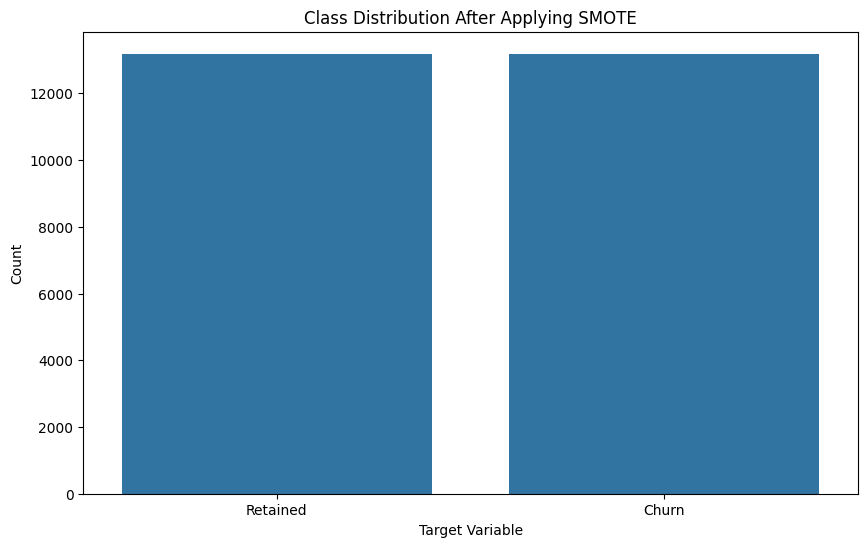

churn
1    13187
0    13187
Name: count, dtype: int64


In [221]:
from imblearn.over_sampling import SMOTE

# Make a copy of our data
train_df_2 = transformed_df_1.copy()

# Separate target variable from independent variables
y = transformed_df_1['churn']
X = transformed_df_1.drop(columns=['churn'])

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=124, sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X, y)

# Plot the class distribution after applying SMOTE
plt.figure(figsize=(10, 6))
sns.countplot(x=y_res)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.xticks((0, 1), ["Retained", "Churn"])
plt.show()

print(y_res.value_counts())

In [222]:
print(X_res.shape)
print(y_res.shape)

(26374, 53)
(26374,)


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42) # use 75% of the data for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19780, 53)
(19780,)
(6594, 53)
(6594,)


#### 2nd base model

In [224]:
# base model for random forest with default parameters
base_model_2 = RandomForestClassifier()
base_model_2.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
# Generate predictions
y_pred = base_model_2.predict(X_test) # predicitions made by the model
y_proba = base_model_2.predict_proba(X_test)[:, 1] # predict class probabilities for each sample in X_test and select the probabilities for the positive class for each sample

#### Evalution of performance of 2nd base model

In [226]:
# Calculate performance metrics here!
# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9487
Precision: 0.9703
Recall: 0.9265
F1-Score: 0.9479
PR-AUC: 0.9873


The metrics have improved from the previous model that had been tuned and the thresholds adjusted

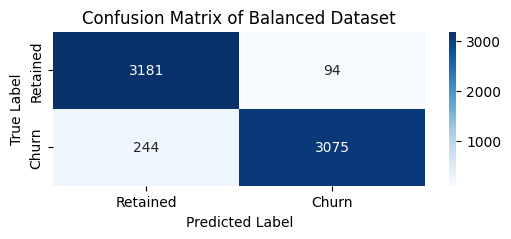

In [227]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(6,2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churn'], yticklabels=['Retained', 'Churn'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Balanced Dataset")
plt.show()

#### Feature importance of second base model

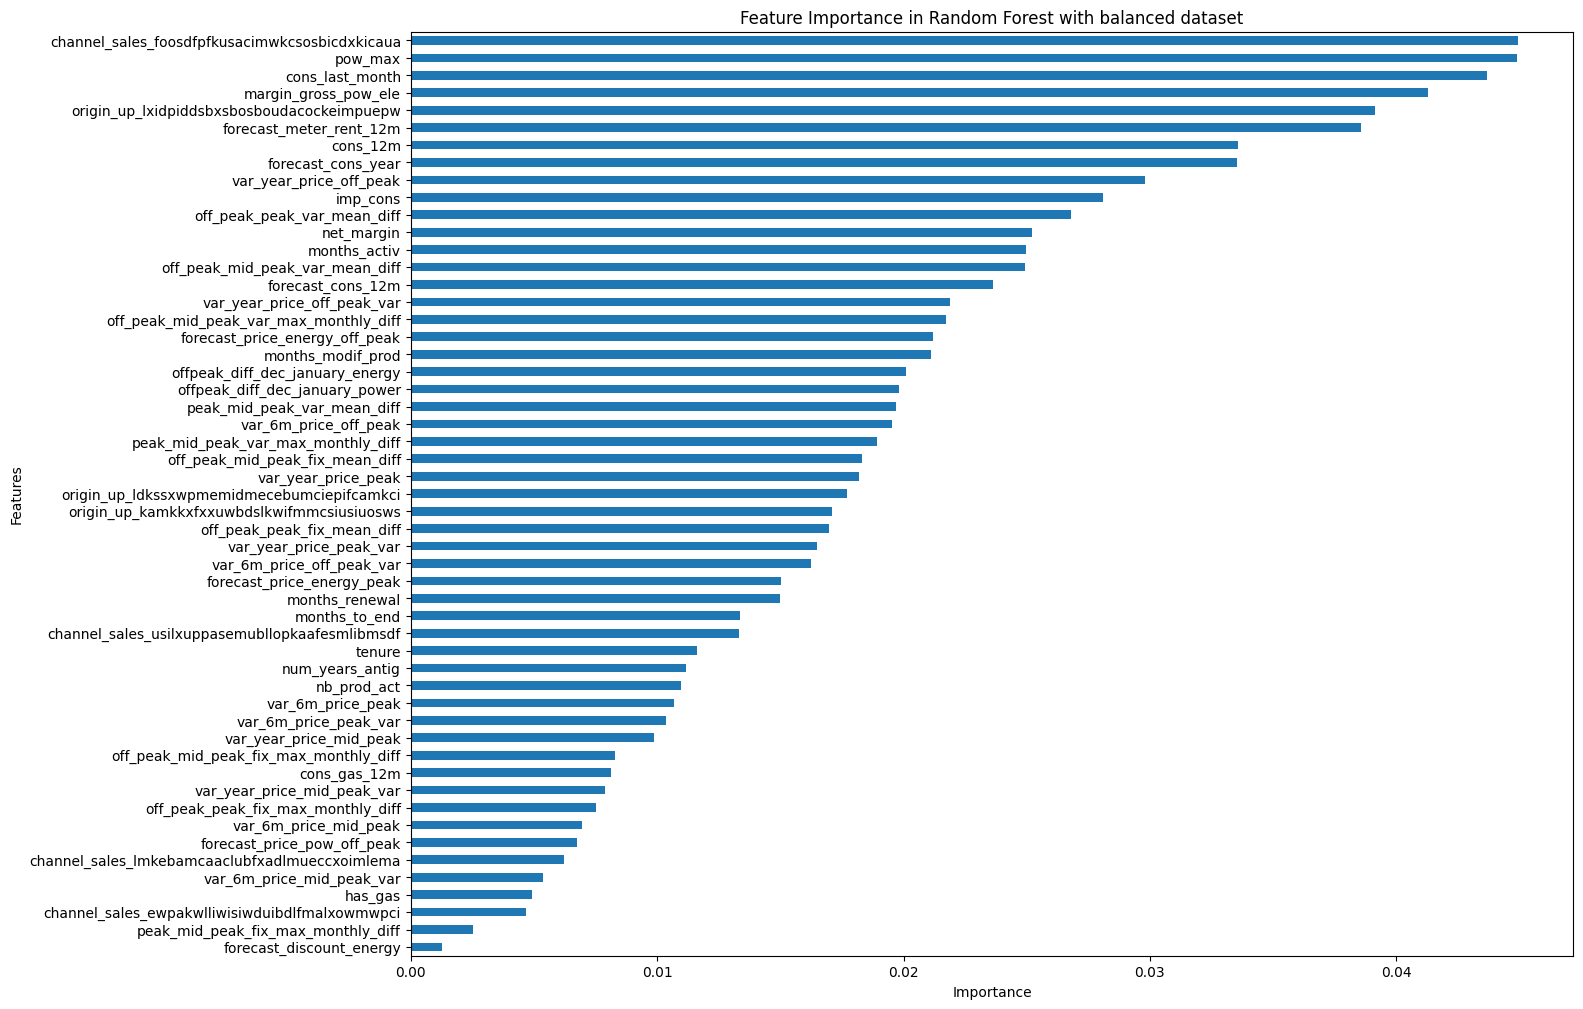

In [228]:
# Find which factors contribute most to churn. 
feature_importances = pd.Series(base_model_2.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(15,12))

plt.title("Feature Importance in Random Forest with balanced dataset")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [229]:
# Get feature importances from the trained model
importances = base_model_2.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances_df)

                                           Feature  Importance
47  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.044938
16                                         pow_max    0.044891
2                                  cons_last_month    0.043691
12                            margin_gross_pow_ele    0.041276
52      origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.039150
6                          forecast_meter_rent_12m    0.038584
0                                         cons_12m    0.033565
4                               forecast_cons_year    0.033527
20                         var_year_price_off_peak    0.029815
11                                        imp_cons    0.028109
31                     off_peak_peak_var_mean_diff    0.026814
14                                      net_margin    0.025222
42                                    months_activ    0.024982
33                 off_peak_mid_peak_var_mean_diff    0.024920
3                                forecast_cons_12m    0

- The top 5 most important features in predicting churn are:
  - subscribed power (pow_max)
  - The **'lxidpiddsbxsbosboudacockeimpuepw'** code of the electricity campaign the customer first subscribed to 
  - The electricity consumption of the last month (cons_last_month)
  - The gross margin on power subscription (margin_gross_pow_ele)
  - The **'foosdfpfkusacimwkcsosbicdxkicaua'** sales channel

- The yearly variation in the variability in price of energy for the 1st period (off peak) hours (var_year_price_off_peak_var) is not in the top as it was previously.
- Instead, electricity consumption of the last month has moved to the top 5.
- One more feature is not important in prediciting churn, this is the code: origin_up_usapbepcfoloekilkwsdiboslwaxobdp

#### Hyperparameter tuning

In [230]:
# Optimize the Random Forest model for better results.
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [300, 400, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None]
}

bal_tuned_model = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_grid, 
    cv=5, 
    n_iter=10, 
    scoring= 'f1',
    n_jobs=-1
)

bal_tuned_model.fit(X_train, y_train)
print("Best Parameters:", bal_tuned_model.best_params_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


### 2.3.5 Using the best parameters to create best model

In [244]:
# use the best parameters
# Best parameters obtained from RandomizedSearchCV
best_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'criterion': 'entropy',
    'max_features': 'sqrt'
}

# Create a new Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Generate predictions
y_pred_best = best_rf_model.predict(X_test)
y_proba_best = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
pr_auc = average_precision_score(y_test, y_proba_best)

# Print metrics
print("Model Evaluation Metrics with Best Parameters:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics with Best Parameters:
Accuracy: 0.9509
Precision: 0.9759
Recall: 0.9253
F1-Score: 0.9499
PR-AUC: 0.9873


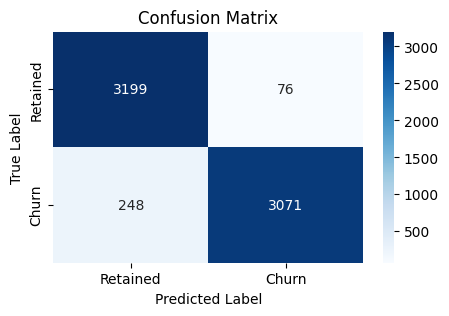

In [245]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Retained', 'Churn'], yticklabels=['Retained', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [246]:
# Generate predicted probabilities for the positive class
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Find the threshold that gives the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")
print(f"Best F1-Score: {f1_scores[best_threshold_index]:.4f}")

Best Threshold: 0.5061
Best F1-Score: 0.9500


In [247]:
# Apply the best threshold to make final predictions
y_pred_threshold = (y_proba >= best_threshold).astype(int)

# Calculate performance metrics with the new threshold
accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
pr_auc = average_precision_score(y_test, y_proba)

# Print metrics
print("Model Evaluation Metrics with Threshold Tuning:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

Model Evaluation Metrics with Threshold Tuning:
Accuracy: 0.9510
Precision: 0.9774
Recall: 0.9241
F1-Score: 0.9500
PR-AUC: 0.9873


In [251]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred_threshold, target_names=['Retained', 'Churn'])
print(report)

              precision    recall  f1-score   support

    Retained       0.93      0.98      0.95      3275
       Churn       0.98      0.92      0.95      3319

    accuracy                           0.95      6594
   macro avg       0.95      0.95      0.95      6594
weighted avg       0.95      0.95      0.95      6594



The metrics are high, therefore this implies that the evaluation metrics are robust and reliable. 

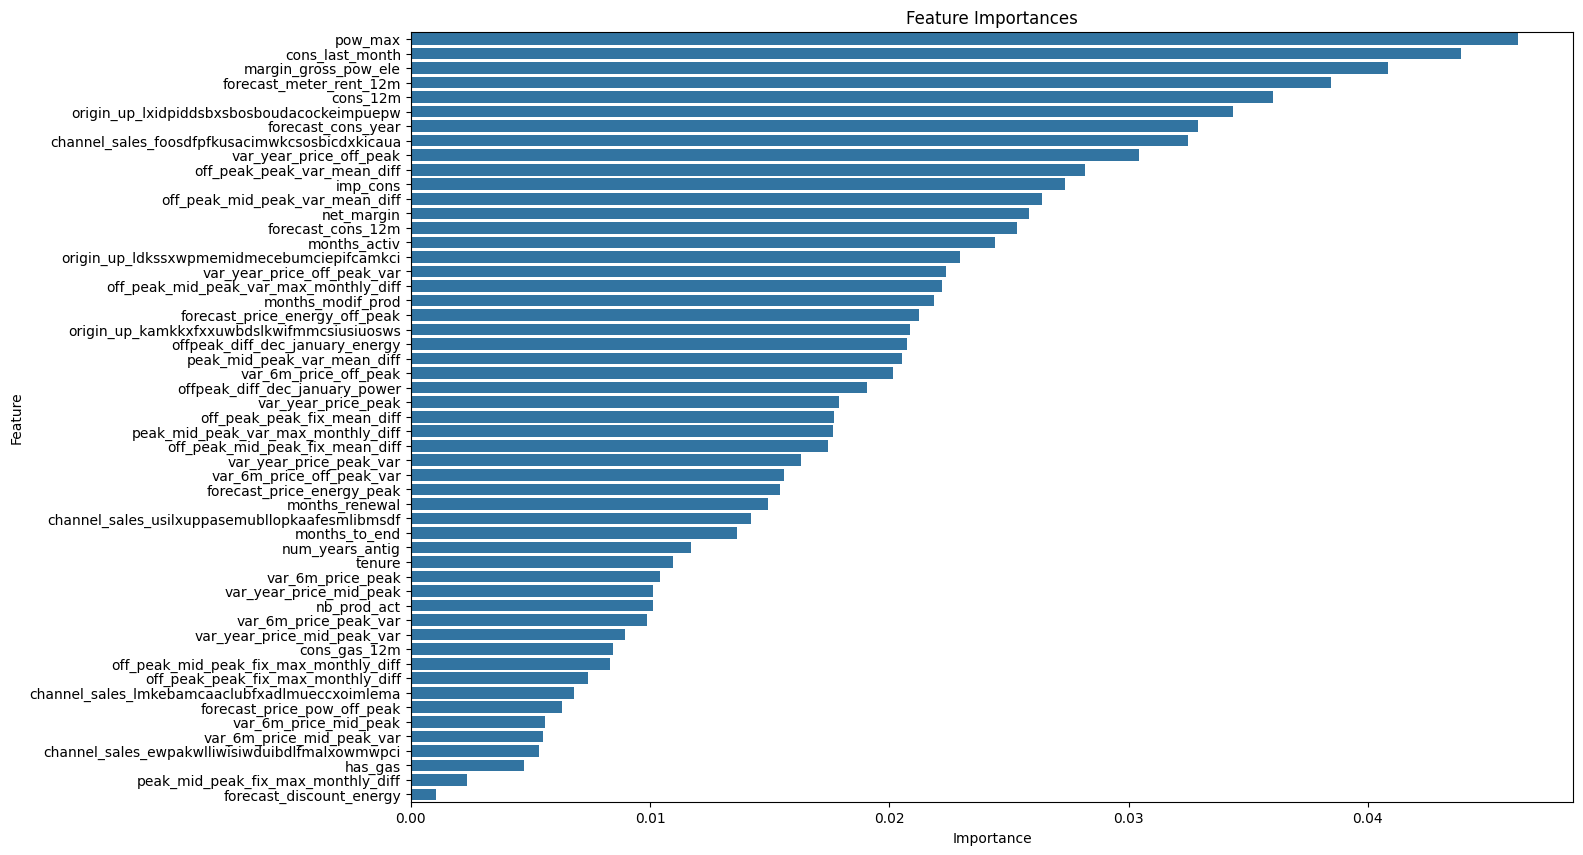

                                           Feature  Importance
16                                         pow_max    0.046268
2                                  cons_last_month    0.043877
12                            margin_gross_pow_ele    0.040829
6                          forecast_meter_rent_12m    0.038459
0                                         cons_12m    0.036039
52      origin_up_lxidpiddsbxsbosboudacockeimpuepw    0.034349
4                               forecast_cons_year    0.032909
47  channel_sales_foosdfpfkusacimwkcsosbicdxkicaua    0.032495
20                         var_year_price_off_peak    0.030413
31                     off_peak_peak_var_mean_diff    0.028186
11                                        imp_cons    0.027361
33                 off_peak_mid_peak_var_mean_diff    0.026377
14                                      net_margin    0.025816
3                                forecast_cons_12m    0.025345
42                                    months_activ    0

In [248]:
# Get feature importances from the trained model
importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

# Print the feature importances
print(feature_importances_df)

The top 5 features predicting churn are:
- subscribed power (pow_max)
- electricity consumption of the last month(cons_last_month)
- gross margin on power subscription (margin_gross_pow_ele)
- forecasted bill of meter rental for the next 2 months (forecast_meter_rent_12m)
- electricity consumption of the past 12 months (cons_12m)

### 2.4 Saving final model

In [249]:
import pickle

# Save the model to a file
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Load the model from the file
with open('best_rf_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


#### 